In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape, x_test.shape

((571, 2), (143, 2))

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [65]:
accuracy_score(y_test, y_pred)

0.6433566433566433

In [59]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

np.float64(0.6289123630672927)

In [84]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [85]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [86]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

d:\CODING\Python\py311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\CODING\Python\py311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [87]:
trf.named_transformers_['first'].n_bins_

array([15])

In [88]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [89]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:, 0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:, 1]
})

In [90]:
output['age_lables'] = pd.cut(x = x_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lables'] = pd.cut(x = x_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [91]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_lables,fare_lables
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
289,22.0,4.0,7.7500,1.0,"(21.0, 23.0]","(7.25, 7.775]"
371,18.0,2.0,6.4958,0.0,"(16.0, 19.0]","(0.0, 7.25]"
318,31.0,8.0,164.8667,14.0,"(30.0, 32.0]","(108.9, 512.329]"
424,18.0,2.0,20.2125,8.0,"(16.0, 19.0]","(18.75, 26.0]"


In [104]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred2 = clf.predict(x_test_trf)

In [105]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [108]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6345070422535212


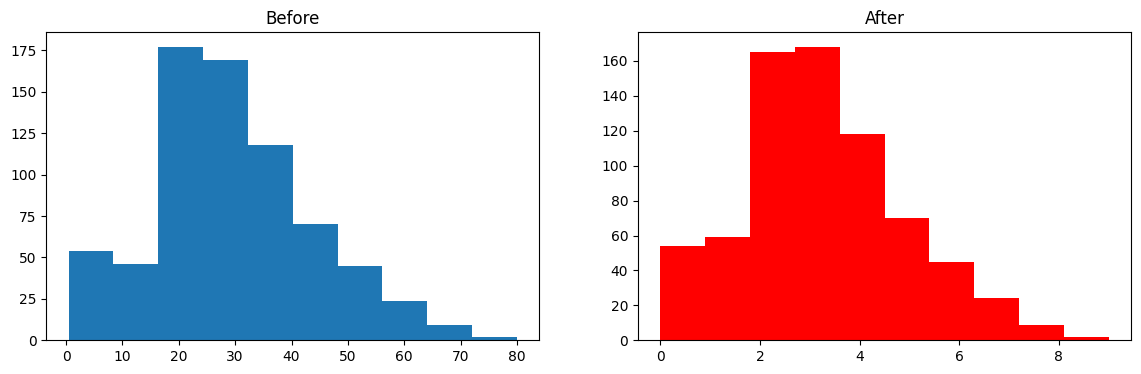

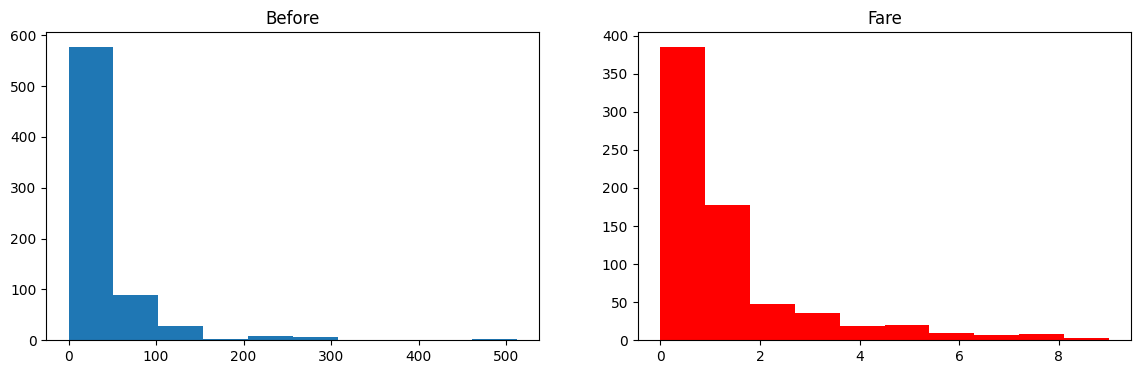

In [111]:
discretize(10, 'kmeans')